<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-3)" data-toc-modified-id="Общее-впечатление-(ревью-3)-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 3)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Изменение-баланса-классов" data-toc-modified-id="Изменение-баланса-классов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изменение баланса классов</a></span></li><li><span><a href="#Ресемплирование-с-уменьшением-класса-0." data-toc-modified-id="Ресемплирование-с-уменьшением-класса-0.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ресемплирование с уменьшением класса 0.</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import re
import seaborn as sns
import time
import warnings


from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [4]:
# Проверим на дубликаты и избавимся от них
data.duplicated().sum()

0

In [5]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

0    0.898321
1    0.101679
Name: toxic, dtype: float64


8.834884437596301

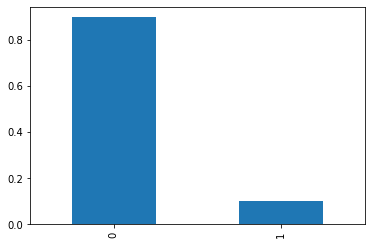

In [6]:
# Исследуем соотношения классов
class_frequency = data['toxic'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
class_ratio = data['toxic'].value_counts()[0] / data['toxic'].value_counts()[1]
class_ratio

Диаграмма  показывает, что классы несбалансированы. Соотношение 1:8.84. После подготовки эмбеддингов необходимо будет провести балансирование классов.

In [7]:
# Оставим в комментариях только слова, состоящие из букв, приведем все буквы к нижнему регистру
# И проведем лемматизацию текста 
m = WordNetLemmatizer()

def lemmatize_text(text):
    text_list = nltk.word_tokenize(text)
    lemm_text = ' '.join(m.lemmatize(t) for t in text_list)
    return lemm_text

def clear_text(text):
    clear_text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    clear_text = ' '.join(clear_text.split())
    return clear_text
data['clear_text'] = data['text'].apply(clear_text)
data['lemm_text'] = data['clear_text'].apply(lemmatize_text)
data = data.drop(['text'], axis=1)
data = data.drop(['clear_text'], axis=1)

Разобьем выборку в соотношении 60:20:20. Уменьшим количество кроссвалидаций до 3 из-за размера выборки.

In [8]:
target = data['toxic']
features = data.drop(['toxic'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

features_train = count_tf_idf.fit_transform(features_train['lemm_text'])
features_valid = count_tf_idf.transform(features_valid['lemm_text'])
features_test = count_tf_idf.transform(features_test['lemm_text'])

print(features_train.shape)
print(features_test.shape)
print(features_valid.shape)
cv_counts = 3

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(95742, 117249)
(31915, 117249)
(31914, 117249)


In [9]:
classificator = LogisticRegression()
train_f1 = cross_val_score(classificator, features_train, target_train, cv=cv_counts, scoring='f1').mean()
print('f1=', train_f1)

f1= 0.6797913828392711


### Изменение баланса классов

In [ ]:
# Метод изменения весов классов
dict_classes = {0:1, 1:class_ratio}
classificator = LogisticRegression(class_weight=dict_classes)
train_f1_ballanced = cross_val_score(classificator, features_train, target_train, cv=cv_counts, scoring='f1').mean()
print('f1 с балансированными классами', train_f1_ballanced)

In [ ]:
classificator = LogisticRegression(class_weight='balanced')
train_f1_balanced = cross_val_score(classificator, features_train, target_train, cv=cv_counts, scoring='f1').mean()
print('f1 с балансированными классами', train_f1_balanced)

Как видно на обучающей выборке f1-мера увеличилась.

### Ресемплирование с уменьшением класса 0.

In [ ]:
# Сдалаем количество записей с классом 0 таким же, как и количество записей с классом 1.
data_train = data.iloc[target_train.index]
target_train_class_zero = data_train[data_train['toxic'] == 0]['toxic']
target_train_class_one = data_train[data_train['toxic'] == 1]['toxic']
target_train_class_zero_downsample = target_train_class_zero.sample(target_train_class_one.shape[0], random_state=12345)
target_train_downsample = pd.concat([target_train_class_zero_downsample, target_train_class_one])

features_train_downsample = data.iloc[target_train_downsample.index]
features_train_downsample, target_train_downsample = shuffle(
    features_train_downsample, target_train_downsample, random_state=12345)
features_train_downsample = count_tf_idf.transform(features_train_downsample['lemm_text'])

del count_tf_idf
del stopwords

In [ ]:
classificator = LogisticRegression()
train_f1_downsample = cross_val_score(
    classificator, features_train_downsample, target_train_downsample, cv=cv_counts, scoring='f1').mean()
print('f1 с уменьшением классов', train_f1_downsample)

Мы получили ощутимый прирост f1-меры.

Построим ROC-AUC графики и посмотрим таблицу результатов балансировки.

In [ ]:
plt.figure(figsize=[12, 9])
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
classificator = LogisticRegression()
classificator.fit(features_train, target_train)
probabilities = classificator.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
auc_roc = roc_auc_score(target_valid, probabilities_one)
valid_f1 = f1_score(target_valid, classificator.predict(features_valid))
plt.plot(fpr, tpr, label='LR')

classificator = LogisticRegression(class_weight=dict_classes)
classificator.fit(features_train, target_train)
probabilities = classificator.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
auc_roc_balanced = roc_auc_score(target_valid, probabilities_one)
valid_f1_balanced = f1_score(target_valid, classificator.predict(features_valid))
plt.plot(fpr, tpr, label='LR balansed classes')

classificator = LogisticRegression()
classificator.fit(features_train_downsample, target_train_downsample)
probabilities = classificator.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
auc_roc_downsample = roc_auc_score(target_valid, probabilities_one)
valid_f1_downsample = f1_score(target_valid, classificator.predict(features_valid))
plt.plot(fpr, tpr, label='LR downsampled classes')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right', fontsize='x-large')
plt.title('ROC-кривая')
plt.show()

In [ ]:
index = ['LogisticRegression', 'LR balansed classes', 'LR downsampled classed']
df = {'F1': [train_f1, train_f1_balanced, train_f1_downsample], 
      'F1 на валидации':[valid_f1, valid_f1_balanced, valid_f1_downsample],
      'AUC-ROC':[auc_roc, auc_roc_balanced, auc_roc_downsample]}
scores_data = pd.DataFrame(data=df, index=index)
scores_data

Выберем метод балансировки по весу.

**Вывод:** В ходе подготовки были получены признаки для обучения и выборка разделена на обучающую, валидационную и тестовую. При тестировании оптимальными оказались показатели f1 и AUC-ROC найденные на ресемплированной выборке у уменьешнием класса 0. В обучении мы будем использовать этот метод балансирования.

In [ ]:
del data_train
del target_train_class_zero
del target_train_class_one
del target_train_class_zero_downsample
del features_train_downsample
del target_train_downsample

## Обучение

### Логистическая регрессия

In [ ]:
%%time
best_model = None
best_result = 0
best_c = 0
for reg in np.linspace(0.0001, 100, 20):
    model = LogisticRegression(random_state=12345, solver = 'liblinear', C=reg, class_weight=dict_classes)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    print(result)
    if result > best_result:
        best_model = model
        best_result = result
        best_c = reg
print('Наилучшее качество модели {:.3f} при регуляризации {}'.format(best_result, best_c))

Наилучшее значение метрики f1 для логистической регрессии на валидационной выборке равно 0.762, было получено для регуляризации равной 5.263

### Случайный лес

In [ ]:
%%time
best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_split = 0
for est in range(10, 101, 10):
    for depth in range (1, 9):
        for spl in (2, 7):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight=dict_classes,
                                           max_depth=depth, min_samples_split = spl)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            result = f1_score(target_valid, predictions)
            print(result)
            if result > best_result:
                best_model = model
                best_result = result
                best_est = est
                best_depth = depth
                best_split = spl

print("F1 наилучшей модели на валидационной выборке:", best_result, 
      "Количество деревьев:", best_est, "Максимальная глубина:", best_depth,
     "Минимальное количество примеров для разделения", best_split)

Наилучшее значение метрики f1 для случайного леса на валидационной выборке равно 0.36, количество деревьев 90, глубина 8, минимальное количество примеров для разделения 7

### LightGBM

In [10]:
best_model = None
best_result = 0
best_est = 0
best_leaves = 0
best_rate = 0
for est in [50, 100, 500]:
    for leave in [31, 41, 51]:
        for rate in [0.04, 0.06, 0.3]:
            model = LGBMClassifier(random_state=12345, n_estimators=est, num_leaves=leave, learning_rate=rate)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            result = f1_score(target_valid, predictions)
            print(result)
            if result > best_result:
                best_model = model
                best_est = est
                best_result = result
                best_leaves = leave
                best_rate = rate
print('f1 наилучшей модели на валидационной выборке=', best_result, 'количество дерервьев=', best_est, 
      'скорость обучения=', best_rate, 'количество листьев=', best_leaves)

0.644135988734661
0.6816334430036772
0.7607829551359778
0.668622848200313
0.6967447173043975
0.7692043306410037
0.6823438704703161
0.7099308023190574
0.7691781992140783
0.6996197718631179
0.7273062051187626
0.7724326168543159
0.718176764869372
0.7366515837104073
0.7700953678474114
0.7267399267399267
0.7449508489722967
0.7735179868265496
0.7640488656195463
0.7694968009683556
0.7687373396353815
0.7663486556808325
0.7730166924797798
0.7671186440677966
0.7712215320910973
0.7706766917293234
0.7634572932586179
f1 наилучшей модели на валидационной выборке= 0.7735179868265496 количество дерервьев= 100 скорость обучения= 0.3 количество листьев= 51


Наилучшее значение метрики f1 для LightGBM на валидационной выборке равно 0.774, количество деревьев 100, скорость обучения 0.3, количество листьев 51

### CatBoost

In [11]:
best_model = None
best_result = 0
best_iter = 0
best_rate = 0
for iter in [150, 500]:
    for rate in [0.04, 0.06, 0.3, 0.5]:
        model = CatBoostClassifier(random_state=12345, iterations=iter, learning_rate=rate)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions)
        print(result)
        if result > best_result:
            best_model = model
            best_result = result
            best_iter = iter
            best_rate = rate
print('f1 лучшей модели на валидационной выборке=', best_result, 'количество итераций=', best_iter, 
      'скорость обучения=', best_rate)

0:	learn: 0.6526066	total: 2.5s	remaining: 6m 11s
1:	learn: 0.6143070	total: 4.36s	remaining: 5m 22s
2:	learn: 0.5799927	total: 6.21s	remaining: 5m 4s
3:	learn: 0.5490910	total: 8.08s	remaining: 4m 55s
4:	learn: 0.5214512	total: 9.89s	remaining: 4m 46s
5:	learn: 0.4956296	total: 11.8s	remaining: 4m 42s
6:	learn: 0.4725438	total: 13.7s	remaining: 4m 39s
7:	learn: 0.4509084	total: 15.5s	remaining: 4m 34s
8:	learn: 0.4313204	total: 17.3s	remaining: 4m 31s
9:	learn: 0.4143445	total: 19.2s	remaining: 4m 28s
10:	learn: 0.3989385	total: 21s	remaining: 4m 25s
11:	learn: 0.3844747	total: 22.9s	remaining: 4m 23s
12:	learn: 0.3717921	total: 24.8s	remaining: 4m 21s
13:	learn: 0.3595032	total: 26.7s	remaining: 4m 19s
14:	learn: 0.3484866	total: 28.6s	remaining: 4m 17s
15:	learn: 0.3384269	total: 30.4s	remaining: 4m 14s
16:	learn: 0.3294836	total: 32.3s	remaining: 4m 12s
17:	learn: 0.3213099	total: 34.2s	remaining: 4m 10s
18:	learn: 0.3138867	total: 36.1s	remaining: 4m 8s
19:	learn: 0.3070095	total:

Наилучшее значение метрики f1 для CatBoost на валидационной выборке равно 0.765, количество итераций 500, скорость обучения 0.5.

## Тестирование

In [12]:
# Создадим таблицу для хранения результатов
d = {'model': [], 'F_1': [], 'fit_time': [], 'predict_time': []}
results = pd.DataFrame(data=d)
results

,model,F_1,fit_time,predict_time


In [13]:
# создадим функцию для добавления результатов в таблицу
def model_res(model_name, model):
    f_1, fit_time, pred_time = ml(model)
    results.loc[len(results)] = [model_name, f_1, fit_time, pred_time]
    if len(results) > 0:
        results.drop_duplicates(inplace=True)

In [14]:
# Cоздадим функцию для расчета необходимых параметров
def ml(model):
    start_fit_time = time.time()
    model.fit(features_train, target_train)
    stop_fit_time = time.time()
    fit_time = stop_fit_time - start_fit_time
    
    start_predict_time = time.time()
    predictions = model.predict(features_test)
    stop_predict_time = time.time()
    
    pred_time = stop_predict_time - start_predict_time
    
    f_1 = f1_score(target_test, predictions)
    
    return f_1, fit_time, pred_time

In [16]:
# логистическая регрессия
dict_classes = {0:1, 1:class_ratio}
lr = LogisticRegression(random_state=12345, solver='liblinear', C=5.263, class_weight=dict_classes)
model_res('LogisticRegression', lr)
display(results)

,model,F_1,fit_time,predict_time
0,LogisticRegression,0.762181,22.283188,0.003862


In [17]:
# случайный лес
rf = RandomForestClassifier(max_depth=8, n_estimators=90, random_state=12345, min_samples_split=2, class_weight=dict_classes)
model_res('RandomForestClassifier', rf)
print(results)

                    model       F_1   fit_time  predict_time
0      LogisticRegression  0.762181  22.283188      0.003862
1  RandomForestClassifier  0.358207   2.110300      0.397370


In [18]:
# Light GBM
lgbm = LGBMClassifier(learning_rate=0.3, n_estimators=100, num_leaves=51, random_state=12345)
model_res('LGBMClassifier', lgbm)
print(results)

                    model       F_1    fit_time  predict_time
0      LogisticRegression  0.762181   22.283188      0.003862
1  RandomForestClassifier  0.358207    2.110300      0.397370
2          LGBMClassifier  0.764817  730.547574      3.926349


In [19]:
# CatBoost
cb = CatBoostClassifier(learning_rate=0.5, iterations=500, random_state=12345)
model_res('CatBoostClassifier', cb)
print(results)

0:	learn: 0.3537887	total: 2.58s	remaining: 21m 29s
1:	learn: 0.2646093	total: 4.58s	remaining: 19m
2:	learn: 0.2389707	total: 6.56s	remaining: 18m 6s
3:	learn: 0.2223779	total: 8.52s	remaining: 17m 35s
4:	learn: 0.2119732	total: 10.6s	remaining: 17m 24s
5:	learn: 0.2051083	total: 12.5s	remaining: 17m 10s
6:	learn: 0.1990418	total: 14.5s	remaining: 16m 57s
7:	learn: 0.1941133	total: 16.4s	remaining: 16m 46s
8:	learn: 0.1909541	total: 18.3s	remaining: 16m 36s
9:	learn: 0.1876826	total: 20.3s	remaining: 16m 33s
10:	learn: 0.1845973	total: 22.1s	remaining: 16m 24s
11:	learn: 0.1805156	total: 24s	remaining: 16m 18s
12:	learn: 0.1775482	total: 26s	remaining: 16m 12s
13:	learn: 0.1750886	total: 27.8s	remaining: 16m 4s
14:	learn: 0.1733173	total: 29.7s	remaining: 16m
15:	learn: 0.1711356	total: 31.7s	remaining: 15m 58s
16:	learn: 0.1689239	total: 33.5s	remaining: 15m 52s
17:	learn: 0.1664346	total: 35.4s	remaining: 15m 47s
18:	learn: 0.1648936	total: 37.3s	remaining: 15m 43s
19:	learn: 0.1634

## Выводы

На тестовой выборке наилучшим является результат, полученный с помощью модели LGBMClassifier, при этом данная модель на обучающей выборке тоже показала лучший результат. Данная модель очень медленно обучается (дольше нее обучается только модель CatBoostClassifier и у нее же самая худшая скорость предсказания. Линейная модель как на тестовой, так и на обучающей выборке имеет хорошую точность предсказания и при это гораздо быстрее как обучается так и предсказывает, поэтому в данной задаче можно использовать и ее.